# Exploratory Data Analysis (EDA) on Babar Azam Cricket Performance 2015 - 2024

In [502]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# lOAD CSV File into data

df= pd.read_csv("BabarAzamCricketPerformance.csv")

In [3]:
# View the data 

df

Runs     Opponent                     Date Match  Match_No  \
0            0    54     Zimbabwe        Lahore  31-May-15   ODI         1   
1            1    25    Sri Lanka      Dambulla  11-Jul-15   ODI         2   
2            2    12    Sri Lanka     Pallekele  15-Jul-15   ODI         3   
3            3    62      England     Abu Dhabi  11-Nov-15   ODI         4   
4            4     4      England     Abu Dhabi  13-Nov-15   ODI         5   
..         ...   ...          ...           ...        ...   ...       ...   
273        273    57  New Zealand      Auckland  12-Jan-24  T20I       274   
274        274    66  New Zealand      Hamilton  14-Jan-24  T20I       275   
275        275    58  New Zealand       Dunedin  17-Jan-24  T20I       276   
276        276    19  New Zealand  Christchurch  19-Jan-24  T20I       277   
277        277    13  New Zealand  Christchurch  21-Jan-24  T20I       278   

     Total  
0       54  
1       79  
2       91  
3      153  
4      157  
..     ...  
273  13169  
274  13235  
275  13293  
276  13312  
277  13325  

[278 rows x 8 columns]

In [4]:
# Check info of data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0              278 non-null    int64 
 1   Runs       278 non-null    int64 
 2   Opponent   278 non-null    object
 3              278 non-null    object
 4   Date       278 non-null    object
 5   Match      278 non-null    object
 6   Match_No   278 non-null    int64 
 7   Total      278 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 17.5+ KB


In [5]:
# Check the shape of data

df.shape

(278, 8)

In [6]:
# we can also use to check for missing values

df.isnull().sum()

             0
Runs         0
Opponent     0
             0
Date         0
Match        0
Match_No     0
Total        0
dtype: int64

In [7]:
# Check the head of the data

df.head()

Runs   Opponent                  Date Match  Match_No  Total
0          0    54   Zimbabwe     Lahore  31-May-15   ODI         1     54
1          1    25  Sri Lanka   Dambulla  11-Jul-15   ODI         2     79
2          2    12  Sri Lanka  Pallekele  15-Jul-15   ODI         3     91
3          3    62    England  Abu Dhabi  11-Nov-15   ODI         4    153
4          4     4    England  Abu Dhabi  13-Nov-15   ODI         5    157

# Part 1 (Data Cleaning)

# There is no missing values in data frame however, we can perform below mentiond steps to clean data:

01. Remove unnecessary columns 
02. Rename column headers to be more descriptive
03. Change data types
    * a. Format date column into datetime format
    * b. Change 'Match Type' column to categorical data type

This would standardize formats, add structure and make the data more consistent and ready for analysis.

In [8]:
# 1. Remove unnecessary column

df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
df

Runs     Opponent                     Date Match  Match_No  Total
0      54     Zimbabwe        Lahore  31-May-15   ODI         1     54
1      25    Sri Lanka      Dambulla  11-Jul-15   ODI         2     79
2      12    Sri Lanka     Pallekele  15-Jul-15   ODI         3     91
3      62      England     Abu Dhabi  11-Nov-15   ODI         4    153
4       4      England     Abu Dhabi  13-Nov-15   ODI         5    157
..    ...          ...           ...        ...   ...       ...    ...
273    57  New Zealand      Auckland  12-Jan-24  T20I       274  13169
274    66  New Zealand      Hamilton  14-Jan-24  T20I       275  13235
275    58  New Zealand       Dunedin  17-Jan-24  T20I       276  13293
276    19  New Zealand  Christchurch  19-Jan-24  T20I       277  13312
277    13  New Zealand  Christchurch  21-Jan-24  T20I       278  13325

[278 rows x 7 columns]

In [10]:
# 2. Rename columns to more descriptive names

df.rename(columns={'Opponent':'Opponent Country', 
                   '        ':'Venue', 
                   'Date':'Match Date',
                   'Match':'Match Type',
                   'Match_No':'Match No',
                   'Total':'Total Runs'},
          inplace=True)

In [11]:
df

Runs Opponent Country         Venue Match Date Match Type  Match No  \
0      54         Zimbabwe        Lahore  31-May-15        ODI         1   
1      25        Sri Lanka      Dambulla  11-Jul-15        ODI         2   
2      12        Sri Lanka     Pallekele  15-Jul-15        ODI         3   
3      62          England     Abu Dhabi  11-Nov-15        ODI         4   
4       4          England     Abu Dhabi  13-Nov-15        ODI         5   
..    ...              ...           ...        ...        ...       ...   
273    57      New Zealand      Auckland  12-Jan-24       T20I       274   
274    66      New Zealand      Hamilton  14-Jan-24       T20I       275   
275    58      New Zealand       Dunedin  17-Jan-24       T20I       276   
276    19      New Zealand  Christchurch  19-Jan-24       T20I       277   
277    13      New Zealand  Christchurch  21-Jan-24       T20I       278   

     Total Runs  
0            54  
1            79  
2            91  
3           153  
4           157  
..          ...  
273       13169  
274       13235  
275       13293  
276       13312  
277       13325  

[278 rows x 7 columns]

# 3. Change data types
a. Format date column into datetime format

b. Change 'Match Type' column to categorical data type

In [12]:
# 3(a). Format date column

df['Match Date'] = pd.to_datetime(df['Match Date'])
#df['Match Date'] = pd.to_datetime(df['Match Date']).dt.strftime('%d-%b-%Y')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Runs              278 non-null    int64         
 1   Opponent Country  278 non-null    object        
 2   Venue             278 non-null    object        
 3   Match Date        278 non-null    datetime64[ns]
 4   Match Type        278 non-null    object        
 5   Match No          278 non-null    int64         
 6   Total Runs        278 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.3+ KB


In [14]:
# 3(b). Change 'Match Type' column to categorical data type

df['Match Type'] = df['Match Type'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Runs              278 non-null    int64         
 1   Opponent Country  278 non-null    object        
 2   Venue             278 non-null    object        
 3   Match Date        278 non-null    datetime64[ns]
 4   Match Type        278 non-null    category      
 5   Match No          278 non-null    int64         
 6   Total Runs        278 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 13.6+ KB


In [16]:
df.describe()

Runs    Match No    Total Runs
count  278.000000  278.000000    278.000000
mean    47.931655  139.500000   6631.100719
std     40.395325   80.395895   4005.003690
min      0.000000    1.000000     54.000000
25%     14.000000   70.250000   2882.250000
50%     40.000000  139.500000   6777.500000
75%     73.750000  208.750000  10479.500000
max    232.000000  278.000000  13325.000000

# Part 2 - Data Analysis & Visualization

In [29]:
# check his highest score & where he scored highest

highest_runs = df['Runs'].max()
highest_run_match = df[df['Runs'] == highest_runs]
highest_run_match

Runs Opponent Country    Venue Match Date Match Type  Match No  \
194   232        Australia  Karachi 2022-03-12       Test       195   

     Total Runs  
194        9334

# Find the type of matches

In [42]:
# type of Matches

df['Match Type'].unique()

['ODI', 'T20I', 'Test']
Categories (3, object): ['ODI', 'T20I', 'Test']

# Check highest run in;
#1. ODI

#2. T20I

#3. TEST

In [43]:
# METHOD: 1

max_runs = df.groupby('Match Type')['Runs'].max()
max_runs

Match Type
ODI     158
T20I    122
Test    232
Name: Runs, dtype: int64

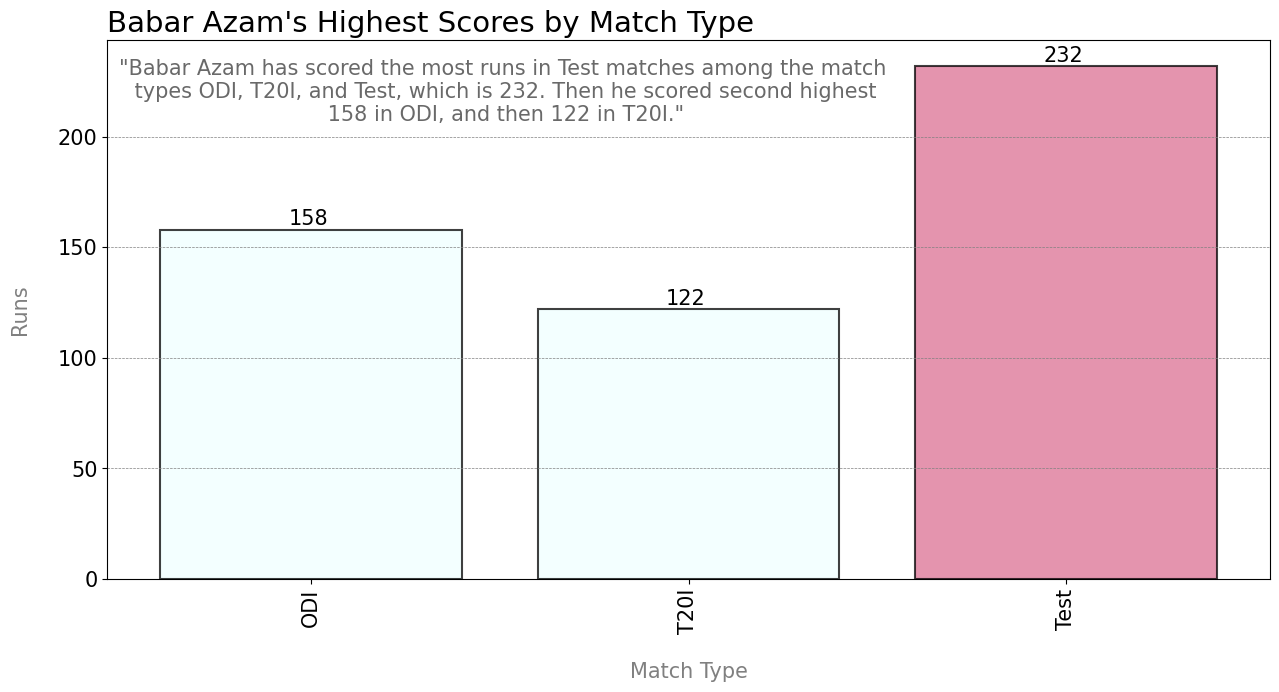

In [210]:
# Groupby and get max runs
max_runs = df.groupby('Match Type')['Runs'].max()

# Plot bar chart
plt.figure(figsize=(15,7))
bars = plt.bar(max_runs.index, max_runs, color='azure', alpha=0.75, edgecolor='black', linewidth=1.5)

# Add labels and title   
plt.ylabel("Runs", color='grey', fontsize=15, labelpad=20)  
plt.xlabel("Match Type", color='grey', fontsize=15, labelpad=20)
plt.title("Babar Azam's Highest Scores by Match Type", fontsize=21, loc='left')

# Add gridlines
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Format ticks   
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)

# Find and highlight max bar 
max_val = max_runs.max()
max_index = max_runs[max_runs==max_val].index[0]
bars[max_runs.index.get_loc(max_index)].set_color("palevioletred")
bars[max_runs.index.get_loc(max_index)].set_edgecolor('black')

# Adding a conclusion inside the chart
plt.text(0.34, 0.85, '"Babar Azam has scored the most runs in Test matches among the match\n types ODI, T20I, and Test, which is 232. Then he scored second highest\n 158 in ODI, and then 122 in T20I."', horizontalalignment="center", fontsize=15, transform=plt.gca().transAxes,
         color='dimgrey')

# Add data labels   
for bar, height in zip(bars, max_runs):
    label = bar.get_height()
    plt.text(bar.get_x()+0.3399, height+2, str(label), fontsize=15)
     

plt.show()

In [205]:
### METHOD: 2

odi_matches = df[df['Match Type']=='ODI']
highest_odi_runs = odi_matches['Runs'].max()

T20I_matches = df[df['Match Type']=='T20I']
highest_T20I_runs = T20I_matches['Runs'].max()
highest_T20I_runs

Test_matches = df[df['Match Type']=='Test']
highest_Test_runs = Test_matches['Runs'].max()
highest_Test_runs

print("Highest Run in ODI:", highest_odi_runs, "\nHighest Run in T20I:", highest_T20I_runs, "\nHighest Run in Test:", highest_Test_runs)

Highest Run in ODI: 158 
Highest Run in T20I: 122 
Highest Run in Test: 232


# Now Find the Opponent Country against highest scores

In [52]:
max_runs = df.groupby('Match Type')['Runs'].max()

for match_type, highest_run in max_runs.items():
    opponent_country = df[(df['Match Type'] == match_type) & (df['Runs'] == highest_run)]['Opponent Country'].iloc[0]
    print(f"Highest Run in {match_type}:", highest_run, "against", opponent_country)


Highest Run in ODI: 158 against England
Highest Run in T20I: 122 against South Africa
Highest Run in Test: 232 against Australia


In [274]:
# Get maximum runs and opponent country
max_runs = df.groupby('Match Type')['Runs'].max()

# Plot bar chart
plt.figure(figsize=(10,8))
bars = plt.bar(max_runs.index, max_runs.values, color='#DFFFF8', alpha=0.75, edgecolor='black', linewidth=1.5) 

# Format plot
plt.ylabel("Runs", fontsize=13)
plt.title("Babar Azam's highest scores against Opponent Country, categorized by Match Type (ODI, T20I & Test)", fontsize=11)
plt.grid(axis='y', color='grey', linestyle='--')

# Annotate bars with opponent country and bar height
for i, (match, runs) in enumerate(max_runs.items()):
    opponent = df[(df['Match Type']==match) & (df['Runs']==runs)]['Opponent Country'].iloc[0]
    
    # Write opponent country inside the bar
    plt.text(i, runs/2, opponent, fontsize=10, color='Black', ha='center', va='center')
    
    # Write bar height at the top and the center of the bar
    plt.text(i, runs, runs, fontsize=10, color='Black', ha='center', va='bottom')
    #plt.text(i, runs/2, runs, fontsize=10, color='Black', ha='center', va='center')

# Highlight highest bar  
max_index = max_runs.values.argmax()
bars[max_index].set_color('#B82BC4')
bars[max_index].set_edgecolor('black')

# Adding a conclusion inside the chart
plt.text(0.5, 0.86, '', horizontalalignment="center", fontsize=14, transform=plt.gca().transAxes,
         color='dimgrey')


# Show plot
plt.show()


# Against which countries he has runs equal to 0, runs >= 50, and runs >= 100

In [379]:
# Number of times runs equal to 0, runs >= 50, and runs >= 100
zero_runs_count = df[df['Runs'] == 0].shape[0]
runs_greater_than_50_count = df[(df['Runs'] >= 50) & (df['Runs'] < 100)].shape[0]
runs_greater_than_100_count = df[df['Runs'] >= 100].shape[0]

# Countries against which runs equal to 0, runs >= 50, and runs >= 100 were scored
zero_runs_countries = df.loc[df['Runs'] == 0, 'Opponent Country'].unique()
runs_greater_than_50_countries = df.loc[(df['Runs'] >= 50) & (df['Runs'] < 100), 'Opponent Country'].unique()
runs_greater_than_100_countries = df.loc[df['Runs'] >= 100, 'Opponent Country'].unique()

# Print the results
print("Number of times runs equal to 0:", zero_runs_count, "against", zero_runs_countries)
print("\nNumber of times runs >= 50 and runs <100:", runs_greater_than_50_count, "against", runs_greater_than_50_countries)
print("\nNumber of times runs >= 100:", runs_greater_than_100_count, "against", runs_greater_than_100_countries)

Number of times runs equal to 0: 20 against ['West Indies', 'Sri Lanka', 'New Zealand', 'Zimbabwe', 'Bangladesh', 'England', 'South Africa', 'Afghanistan', 'India']
Categories (17, object): ['Afghanistan', 'Australia', 'Bangladesh', 'England', ..., 'Sri Lanka', 'West Indies', 'World-XI', 'Zimbabwe']

Number of times runs >= 50 and runs <100: 84 against ['Zimbabwe', 'England', 'New Zealand', 'West Indies', 'Australia', ..., 'Bangladesh', 'India', 'Namibia', 'Scotland', 'Netherlands']
Length: 15
Categories (17, object): ['Afghanistan', 'Australia', 'Bangladesh', 'England', ..., 'Sri Lanka', 'West Indies', 'World-XI', 'Zimbabwe']

Number of times runs >= 100: 36 against ['West Indies', 'New Zealand', 'Australia', 'Sri Lanka', 'Zimbabwe', 'England', 'Bangladesh', 'South Africa', 'Nepal']
Categories (17, object): ['Afghanistan', 'Australia', 'Bangladesh', 'England', ..., 'Sri Lanka', 'West Indies', 'World-XI', 'Zimbabwe']


In [371]:
# Group by country and count occurrences of runs categories
runs_categories = df.groupby(['Opponent Country', pd.cut(df['Runs'], bins=[-1, 0, 50, float('inf')], labels=['0 Runs', '50+ Runs', '100+ Runs'])]).size().unstack(fill_value=0)

# Plot grouped bar chart with custom colors
runs_categories.plot(kind='bar', stacked=True, figsize=(20, 18), color=['#04FFC5', '#FF37B0', '#D6E080'])

# Customize plot
plt.title('Babar Azam scored against countries', fontsize=25)
plt.xlabel('Opponent Countries', fontsize=20, color='gray')
plt.ylabel('Number of Matches', fontsize=20, color='gray')

# Format ticks   
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(fontsize=20)

max_count = runs_categories.max().max()
conclusion_y = 0.0001 * max_count

# Adding a conclusion inside the chart
plt.text(0.5, -0.25, '''This clearly visualizes the number and distribution of matches falling in each\n runs category (0, 50+, 100+) for each opponent country as stacked bars in different\n colors. The stacked bar chart is an effective way to analyze Babar Azam's performance\n statistics broken down by country and runs scored.''', horizontalalignment="center", transform=plt.gca().transAxes,
         color='dimgrey', fontsize=18)

plt.legend(title='Runs Category', fontsize= 20)

# Show plot
plt.tight_layout()
plt.show()


In [381]:
# Find runs equal to 0
zero_runs = df[df['Runs'] == 0]
zero_runs_count = zero_runs['Opponent Country'].value_counts()

# Find runs greater than or equal to 50 & less than 100
fifty_or_more_runs = df[(df['Runs'] >= 50) & (df['Runs'] < 100)]
fifty_or_more_runs_count = fifty_or_more_runs['Opponent Country'].value_counts()

# Find runs greater than or equal to 100
hundred_or_more_runs = df[df['Runs'] >= 100]
hundred_or_more_runs_count = hundred_or_more_runs['Opponent Country'].value_counts()

# Print the results
print("Against which country Babar Azam scored 0 runs and the number of times:", zero_runs_count)
print("\nAgainst which country Babar Azam scored 50 or more runs and the number of times:", fifty_or_more_runs_count)
print("\nAgainst which country Babar Azam scored 100 or more runs and the number of times:", hundred_or_more_runs_count)

Against which country Babar Azam scored 0 runs and the number of times: West Indies     5
Zimbabwe        3
New Zealand     3
India           2
Afghanistan     2
England         2
South Africa    1
Sri Lanka       1
Bangladesh      1
Hong Kong       0
Ireland         0
Namibia         0
Australia       0
Netherlands     0
Scotland        0
World-XI        0
Nepal           0
Name: Opponent Country, dtype: int64

Against which country Babar Azam scored 50 or more runs and the number of times: New Zealand     18
England         13
West Indies     10
South Africa    10
Australia        8
Afghanistan      5
Zimbabwe         5
Bangladesh       4
Netherlands      3
India            2
Sri Lanka        2
Namibia          1
Ireland          1
Scotland         1
World-XI         1
Hong Kong        0
Nepal            0
Name: Opponent Country, dtype: int64

Against which country Babar Azam scored 100 or more runs and the number of times: Australia       7
West Indies     6
Sri Lanka       6
New Ze

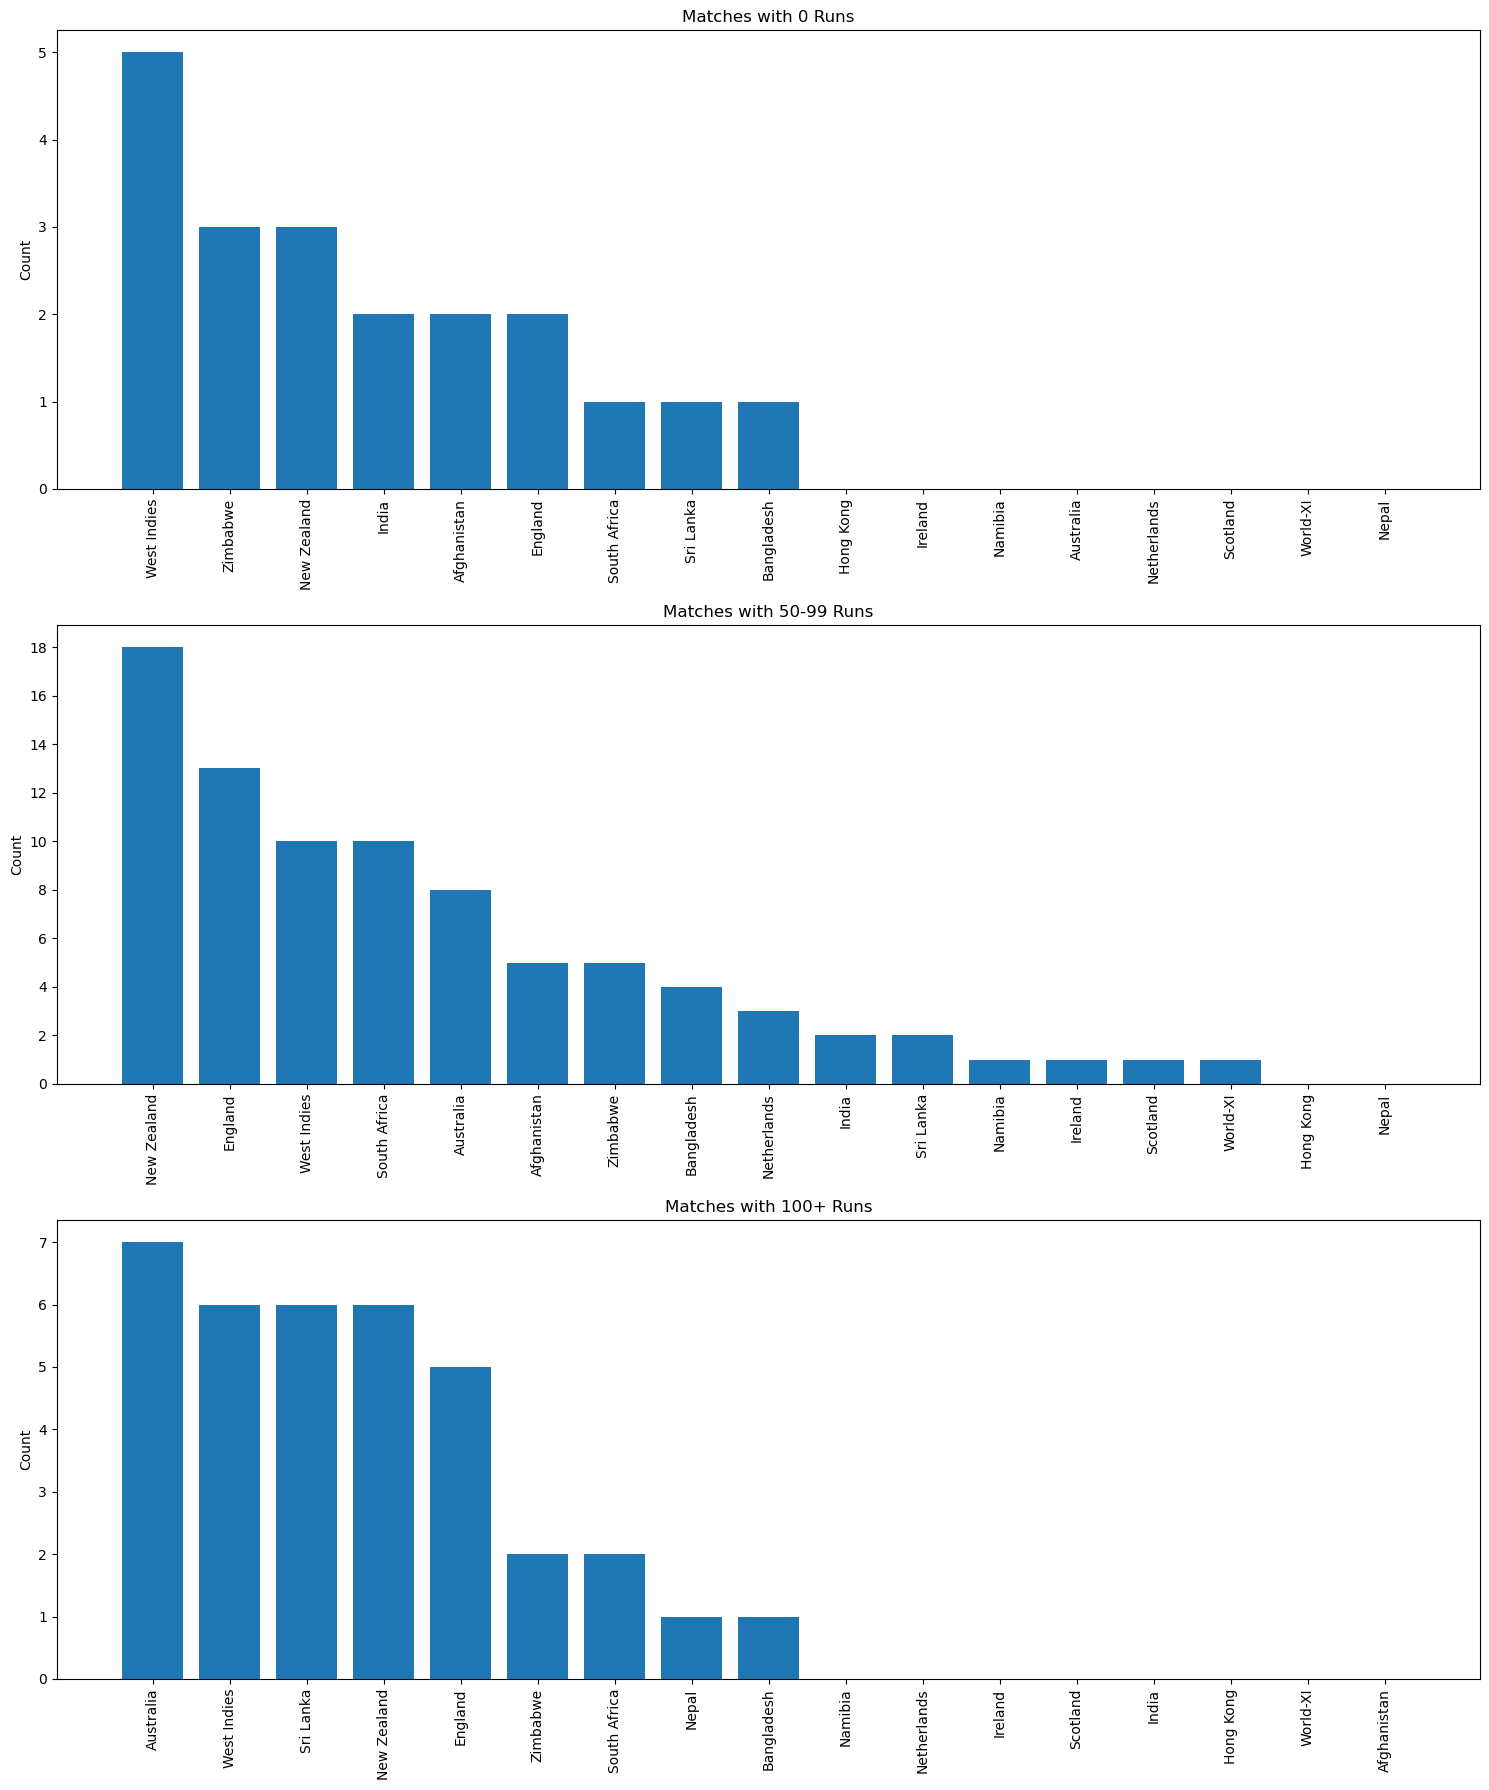

In [415]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Number of times runs equal to 0, runs >= 50, and runs >= 100
zero_runs_count = df[df['Runs'] == 0].shape[0]
runs_greater_than_50_count = df[(df['Runs'] >= 50) & (df['Runs'] < 100)].shape[0]
runs_greater_than_100_count = df[df['Runs'] >= 100].shape[0]

# Countries against which runs equal to 0, runs >= 50, and runs >= 100 were scored
zero_runs_countries = df.loc[df['Runs'] == 0, 'Opponent Country'].value_counts()
runs_greater_than_50_countries = df.loc[(df['Runs'] >= 50) & (df['Runs'] < 100), 'Opponent Country'].value_counts()
runs_greater_than_100_countries = df.loc[df['Runs'] >= 100, 'Opponent Country'].value_counts()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# Plot for runs equal to 0
axes[0].bar(zero_runs_countries.index, zero_runs_countries.values)
axes[0].set_title('Matches with 0 Runs')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)
axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))  # Set y-axis tick formatter to integer

# Plot for runs greater than or equal to 50 but less than 100
axes[1].bar(runs_greater_than_50_countries.index, runs_greater_than_50_countries.values)
axes[1].set_title('Matches with 50-99 Runs')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))  # Set y-axis tick formatter to integer

# Plot for runs greater than or equal to 100
axes[2].bar(runs_greater_than_100_countries.index, runs_greater_than_100_countries.values)
axes[2].set_title('Matches with 100+ Runs')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)
axes[2].yaxis.set_major_locator(MaxNLocator(integer=True))  # Set y-axis tick formatter to integer

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# How many matches he has played against each country

In [74]:
# Count the number of matches played against each country
matches_played_by_country = df['Opponent Country'].value_counts()

print("Number of matches played against each country:\n \n", matches_played_by_country)

Number of matches played against each country:
 
 New Zealand     48
England         43
West Indies     33
Australia       31
Sri Lanka       28
South Africa    27
Zimbabwe        18
Bangladesh      15
India           12
Afghanistan      8
Netherlands      5
World-XI         3
Ireland          2
Hong Kong        2
Namibia          1
Scotland         1
Nepal            1
Name: Opponent Country, dtype: int64


In [405]:
#Find percentage of matches he has played against each country

match_type = df.groupby(['Opponent Country', 'Match Type'])['Runs'].count()

total_matches = match_type.sum(level=1)

odi_pct = 100 * match_type.loc[match_type.index.get_level_values(1) == 'ODI'] / total_matches
t20_pct = 100 * match_type.loc[match_type.index.get_level_values(1) == 'T20I'] / total_matches
test_pct = 100 * match_type.loc[match_type.index.get_level_values(1) == 'Test'] / total_matches

odi_pct = odi_pct.rename('ODI (%)')
t20_pct = t20_pct.rename('T20I (%)')
test_pct = test_pct.rename('Test (%)')

print(pd.concat([odi_pct, t20_pct, test_pct], axis=1))

                               ODI (%)   T20I (%)   Test (%)
Opponent Country Match Type                                 
Afghanistan      ODI          5.128205        NaN        NaN
Australia        ODI          8.547009        NaN        NaN
Bangladesh       ODI          3.418803        NaN        NaN
England          ODI         17.094017        NaN        NaN
Hong Kong        ODI          0.854701        NaN        NaN
India            ODI          6.837607        NaN        NaN
Ireland          ODI          0.854701        NaN        NaN
Namibia          ODI          0.000000        NaN        NaN
Nepal            ODI          0.854701        NaN        NaN
Netherlands      ODI          3.418803        NaN        NaN
New Zealand      ODI         17.094017        NaN        NaN
Scotland         ODI          0.000000        NaN        NaN
South Africa     ODI          9.401709        NaN        NaN
Sri Lanka        ODI         10.256410        NaN        NaN
West Indies      ODI    

C:\Users\HP\AppData\Local\Temp\ipykernel_13964\4028794995.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  total_matches = match_type.sum(level=1)


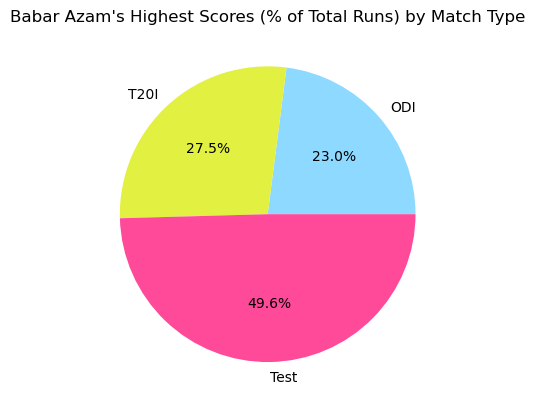

In [501]:
# Total runs by match type
total_runs = df.groupby('Match Type')['Runs'].sum()
match_type_pct = 100 * max_runs / total_runs

# Define colors
colors = ['#8ED9FF', '#E2F041', '#FF4999'] 

plt.pie(match_type_pct, 
       labels=match_type_pct.index,  
       autopct='%1.1f%%',
       colors=colors)
       
plt.title("Babar Azam's Highest Scores (% of Total Runs) by Match Type")

plt.show()

# Year wise performance

In [75]:
# Extract year from 'Match Date'
df['Year'] = df['Match Date'].dt.year

# Sum the runs scored year-wise
yearly_runs = df.groupby('Year')['Runs'].sum()

# Print the results
print("Year-wise runs scored:")
print(yearly_runs)


Year-wise runs scored:
Year
2015     230
2016    1063
2017    1408
2018    1688
2019    2082
2020     835
2021    1760
2022    2598
2023    1399
2024     262
Name: Runs, dtype: int64


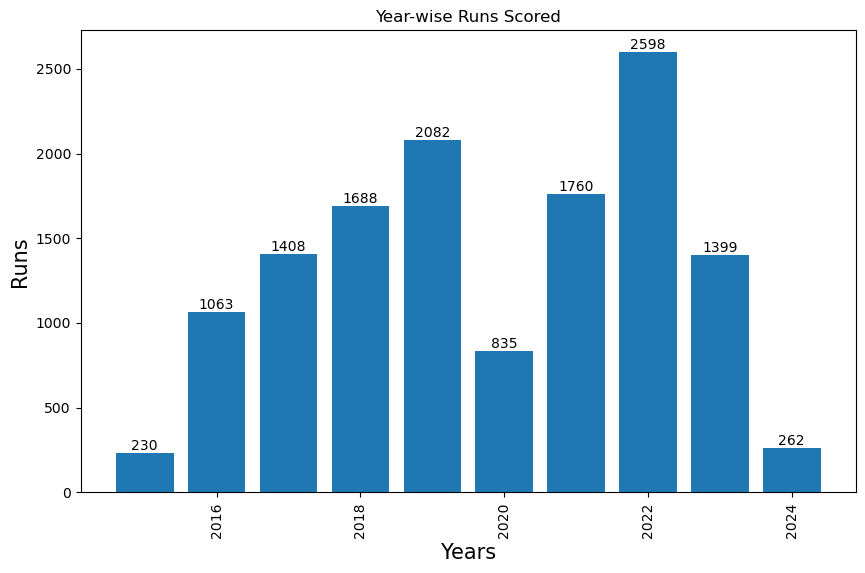

In [440]:
df['Year'] = df['Match Date'].dt.year
yearly_runs = df.groupby('Year')['Runs'].sum()
plt.figure(figsize=(10,6))
bars = plt.bar(yearly_runs.index, yearly_runs, color='c')
plt.xlabel('Years', fontsize= 15)
plt.ylabel('Runs', fontsize= 15)
plt.title('Year-wise Runs Scored')

bars = plt.bar(yearly_runs.index, yearly_runs)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')
    plt.xticks(rotation=90, fontsize=10)

plt.show()

In [82]:
# year wise performance with each match type

# Extract year from 'Match Date'
df['Year'] = df['Match Date'].dt.year

# Sum the runs scored year-wise and by match type
yearly_runs_by_type = df.groupby(['Year', 'Match Type'])['Runs'].sum()

# Print the results
print("Year-wise runs scored by match type:")
print(yearly_runs_by_type)

Year-wise runs scored by match type:
Year  Match Type
2015  ODI            230
      T20I             0
      Test             0
2016  ODI            656
      T20I           116
      Test           291
2017  ODI            872
      T20I           352
      Test           184
2018  ODI            509
      T20I           563
      Test           616
2019  ODI           1092
      T20I           374
      Test           616
2020  ODI            221
      T20I           276
      Test           338
2021  ODI            405
      T20I           939
      Test           416
2022  ODI            679
      T20I           735
      Test          1184
2023  ODI           1065
      T20I           130
      Test           204
2024  ODI              0
      T20I           213
      Test            49
Name: Runs, dtype: int64


In [84]:
# Filter ODI matches
odi_matches = df[df['Match Type'] == 'ODI']

# Extract year from 'Match Date' for ODI matches
odi_matches['Year'] = odi_matches['Match Date'].dt.year

# Sum the runs scored year-wise in ODI matches
yearly_runs_odi = odi_matches.groupby('Year')['Runs'].sum()

# Print the results
print("Year-wise runs scored in ODI:")
print(yearly_runs_odi)

Year-wise runs scored in ODI:
Year
2015     230
2016     656
2017     872
2018     509
2019    1092
2020     221
2021     405
2022     679
2023    1065
Name: Runs, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13964\994518249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_matches['Year'] = odi_matches['Match Date'].dt.year


In [85]:
# Filter T20I matches
T20I_matches = df[df['Match Type'] == 'T20I']

# Extract year from 'Match Date' for T20I matches
T20I_matches['Year'] = T20I_matches['Match Date'].dt.year

# Sum the runs scored year-wise in ODI matches
yearly_runs_T20I = T20I_matches.groupby('Year')['Runs'].sum()

# Print the results
print("Year-wise runs scored in T20I:")
print(yearly_runs_T20I)

Year-wise runs scored in T20I:
Year
2016    116
2017    352
2018    563
2019    374
2020    276
2021    939
2022    735
2023    130
2024    213
Name: Runs, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13964\1907164153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T20I_matches['Year'] = T20I_matches['Match Date'].dt.year


In [86]:
# Filter Test matches
T20I_matches = df[df['Match Type'] == 'Test']

# Extract year from 'Match Date' for Test matches
Test_matches['Year'] = Test_matches['Match Date'].dt.year

# Sum the runs scored year-wise in ODI matches
yearly_runs_Test = Test_matches.groupby('Year')['Runs'].sum()

# Print the results
print("Year-wise runs scored in Test:")
print(yearly_runs_Test)

Year-wise runs scored in Test:
Year
2016     291
2017     184
2018     616
2019     616
2020     338
2021     416
2022    1184
2023     204
2024      49
Name: Runs, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13964\955567217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_matches['Year'] = Test_matches['Match Date'].dt.year


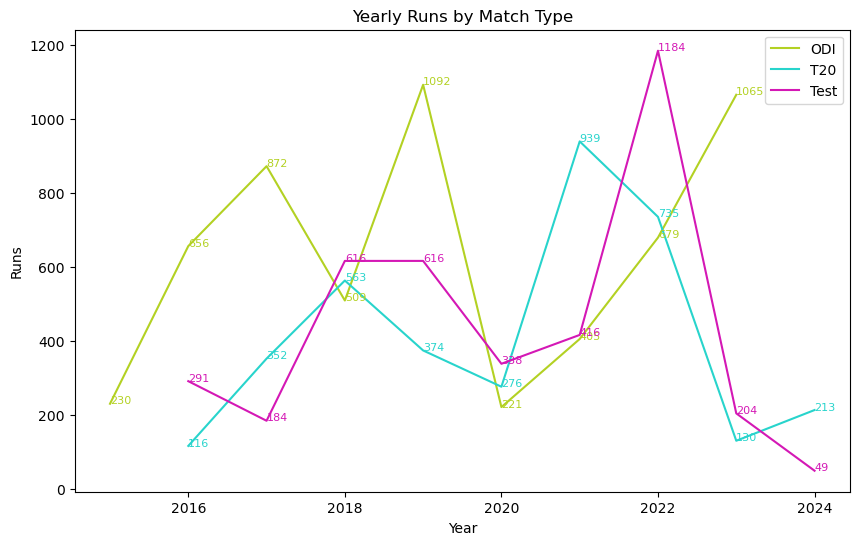

In [460]:
# Filter matches
odi_matches = df[df['Match Type'] == 'ODI']
T20I_matches = df[df['Match Type'] == 'T20I']
Test_matches = df[df['Match Type'] == 'Test']

# Group runs by type
yearly_runs_odi = odi_matches.groupby('Year')['Runs'].sum()
yearly_runs_t20 = T20I_matches.groupby('Year')['Runs'].sum()
yearly_runs_test = Test_matches.groupby('Year')['Runs'].sum()

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(yearly_runs_odi.index, yearly_runs_odi, color='#B3D123', label='ODI')
ax.plot(yearly_runs_t20.index, yearly_runs_t20, color='#28D4CC', label='T20')
ax.plot(yearly_runs_test.index, yearly_runs_test, color='#D418B5', label='Test')

# Annotate points
for i, data in enumerate([yearly_runs_odi, yearly_runs_t20, yearly_runs_test]):
    for year, point in zip(data.index, data):
        ax.text(year, point, str(point), color=fig.gca().lines[i].get_color(), fontsize=8)

# Add labels
ax.set_title('Yearly Runs by Match Type')
ax.set_xlabel('Year')
ax.set_ylabel('Runs')
ax.legend()

# Show plot
plt.show()

# Total ODI Runs, T20I Runs and Test Runs

In [79]:
# Filter ODI matches
odi_matches = df[df['Match Type'] == 'ODI']
odi_runs = odi_matches['Runs'].sum()
total_odi_matches = odi_matches.shape[0]

# Filter T20I matches
t20i_matches = df[df['Match Type'] == 'T20I']
t20i_runs = t20i_matches['Runs'].sum()
total_t20i_matches = t20i_matches.shape[0]

# Filter Test matches
test_matches = df[df['Match Type'] == 'Test']  # Make sure the 'TEST' is in uppercase
test_runs = test_matches['Runs'].sum()
total_test_matches = test_matches.shape[0]

# Print the results
print("Total number of ODI matches:", total_odi_matches, "Total runs scored in ODI:", odi_runs)
print("Total number of T20I matches:", total_t20i_matches, "Total runs scored in T20I:", t20i_runs)
print("Total number of Test matches:", total_test_matches, "Total runs scored in Test:", test_runs)

Total number of ODI matches: 117 Total runs scored in ODI: 5729
Total number of T20I matches: 109 Total runs scored in T20I: 3698
Total number of Test matches: 52 Total runs scored in Test: 3898


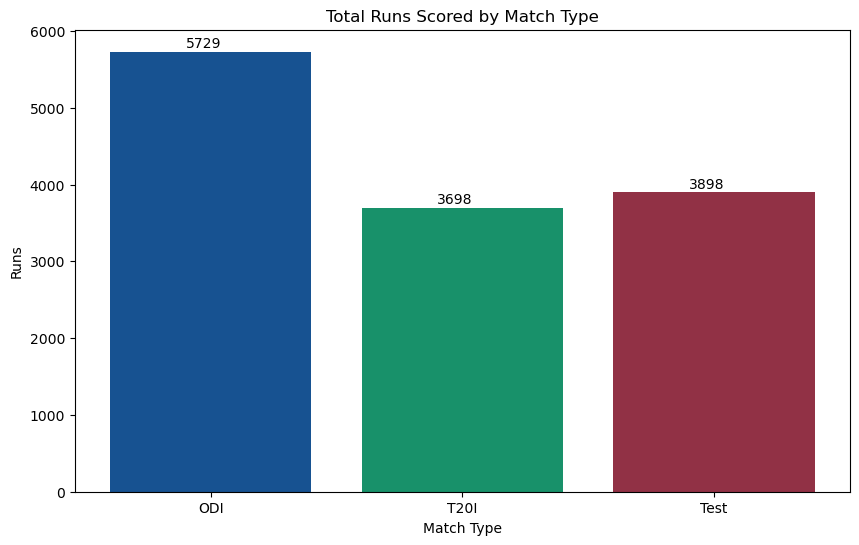

In [466]:

# Filter ODI matches
odi_matches = df[df['Match Type'] == 'ODI']
odi_runs = odi_matches['Runs'].sum()
total_odi_matches = odi_matches.shape[0]

# Filter T20I matches
t20i_matches = df[df['Match Type'] == 'T20I']
t20i_runs = t20i_matches['Runs'].sum()
total_t20i_matches = t20i_matches.shape[0]

# Filter Test matches
test_matches = df[df['Match Type'] == 'Test']  # 'TEST' should be in uppercase
test_runs = test_matches['Runs'].sum()
total_test_matches = test_matches.shape[0]

# Match types
types = ['ODI', 'T20I', 'Test']

# Runs scored
runs = [odi_runs, t20i_runs, test_runs]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(types, runs, color=['#175291', '#18916A', '#913145'])

# Labels
ax.set_title("Total Runs Scored by Match Type")
ax.set_xlabel("Match Type")
ax.set_ylabel("Runs")

# Annotate runs above each bar
for i, v in enumerate(runs):
    ax.text(i - 0.1, v + 50, str(v), color='k', fontsize=10)

# Show plot
plt.show()

In [468]:
# Count the number of vanues he has played
#METHOD: 1
venue_played = df['Venue'].value_counts()

print("Number of venues he has played:\n \n", venue_played)

Number of venues he has played:
 
 Lahore               25
Karachi              24
Dubai (DSC)          23
Abu Dhabi            19
Rawalpindi           15
Sharjah               9
Christchurch          8
Centurion             7
Manchester            7
Johannesburg          6
Providence            6
Sydney                6
Multan                5
Bulawayo              5
Melbourne             5
Perth                 5
Harare                5
Cardiff               5
Nottingham            5
Lord's                5
Leeds                 4
Mirpur                4
Wellington            4
Southampton           4
Birmingham            4
Rotterdam             3
Cape Town             3
Auckland              3
Galle                 3
Hamilton              3
Brisbane              3
Kingston              3
Port of Spain         3
Bridgetown            3
Adelaide              3
Colombo (RPS)         3
Hambantota            2
Hyderabad             2
Bengaluru             2
Chennai               2
The O

In [89]:
# METHOD: 2

max_Venue_runs = df.groupby('Venue')['Runs'].max()
max_Venue_runs

Venue
Abu Dhabi            117
Adelaide             105
Ahmedabad             50
Auckland              83
Bengaluru             66
Birmingham           158
Bridgetown            29
Brisbane             105
Bristol               15
Bulawayo             106
Canberra              50
Cape Town             74
Cardiff               65
Centurion            122
Chattogram            23
Chennai               74
Christchurch          79
Colombo (RPS)         60
Colombo (SSC)         39
Dambulla              25
Dubai (DSC)          127
Dublin (Malahide)     73
Dunedin               58
Durban                12
Eden Gardens          38
Galle                174
Gqeberha              49
Hambantota            53
Hamilton             106
Harare                52
Hyderabad             10
Johannesburg          90
Karachi              232
Kingston             108
Lahore               122
Leeds                 80
Lord's                96
Manchester            74
Melbourne             42
Mirpur             

In [492]:
#Group and get maximum runs scored at each venue
max_Venue_runs = df.groupby('Venue')['Runs'].max()

#Calculate percentage of total runs for each venue
total_runs = max_Venue_runs.sum()
venue_perc = (max_Venue_runs/total_runs)*100

# Plot pie chart
fig1, ax1 = plt.subplots(figsize=(90, 90))

ax1.pie(venue_perc, labels=venue_perc.index, autopct='%1.1f%%', 
        shadow=True, startangle=90, textprops={'fontsize': 60, 'rotation': 45})  
ax1.axis('equal')

# Add title 
plt.title('Percentage of Maximum Runs by Venue', 
          fontsize=100, y=1.04) 

# Show plot
plt.show()